<a href="https://colab.research.google.com/github/sanika2694/ML-/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [ ]:
df = sns.load_dataset ("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [ ]:
df["bill_length_mm"].mean()

np.float64(43.9219298245614)

In [ ]:
df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].mean()

,0
bill_length_mm,43.921930
bill_depth_mm,17.151170
flipper_length_mm,200.915205
body_mass_g,4201.754386


<Axes: xlabel='sex'>

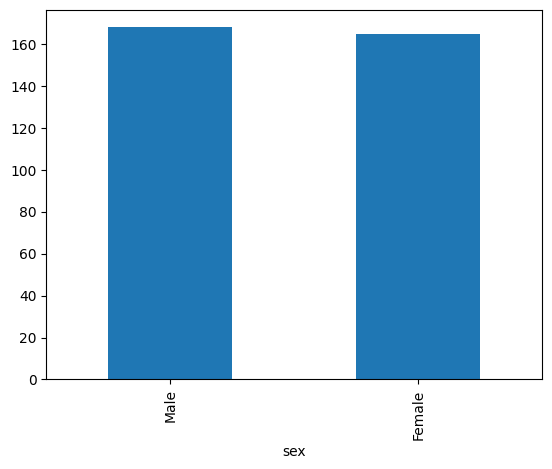

In [ ]:
df["sex"].value_counts().plot(kind="bar")

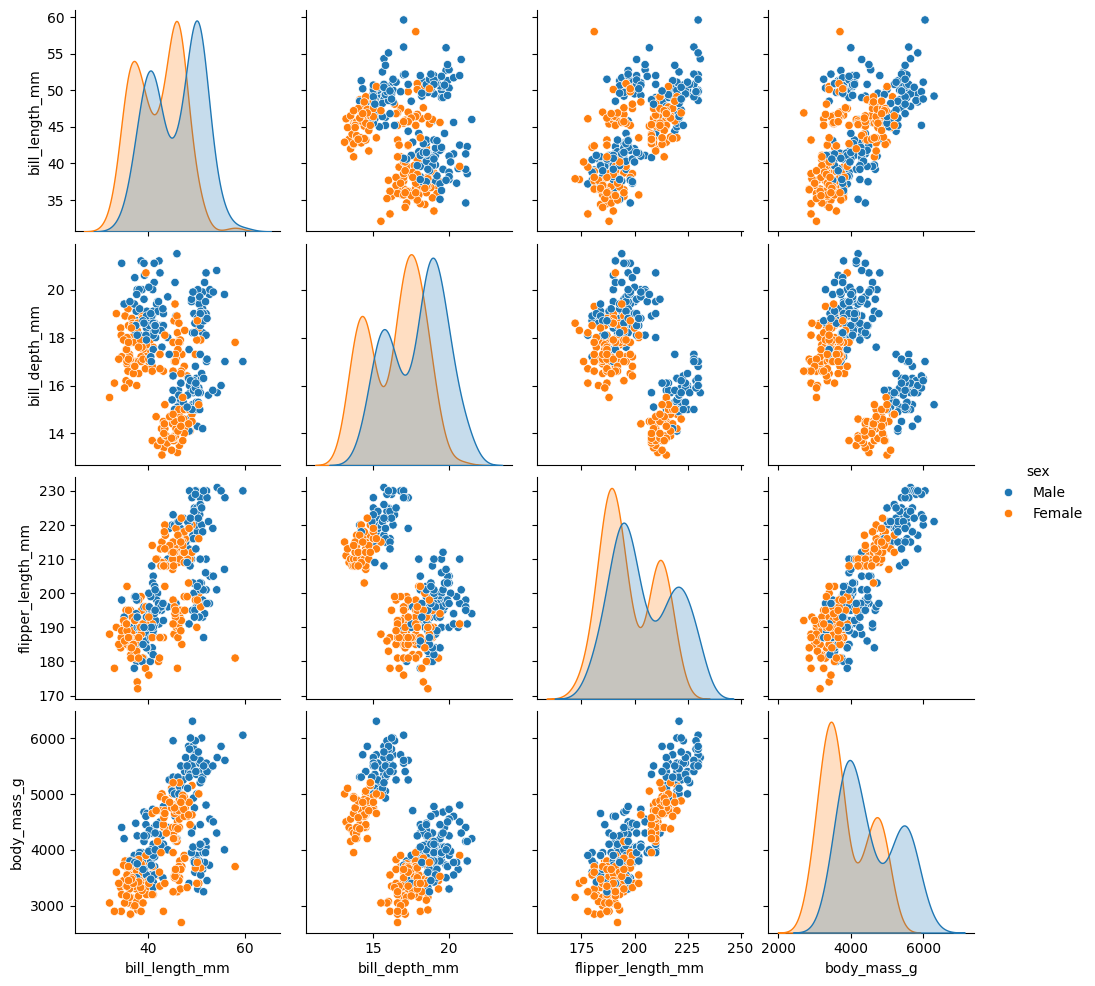

In [ ]:
sns.pairplot(data=df,hue="sex")

<Axes: ylabel='count'>

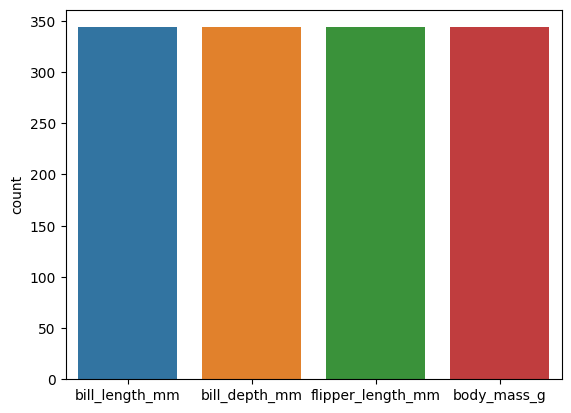

In [ ]:
sns.countplot(df)

In [ ]:
%%time
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
df_copy = df.copy()
df_copy.dropna(inplace = True)

le = LabelEncoder()

for i in df_copy.columns:
  if  df_copy[i].dtype == "object":
     df_copy[i]= le.fit_transform(df_copy[i])
X = df_copy.drop("sex",axis=1)
y=df_copy["sex"]
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model.fit(X,y)
prd = model.predict(X)
acc =metrics.accuracy_score(y,prd)

CPU times: user 37.1 ms, sys: 1.08 ms, total: 38.2 ms
Wall time: 36.5 ms


In [ ]:
acc

0.8828828828828829

In [ ]:
# svm
%%time
from sklearn.svm import SVC
model = SVC()
model.fit(X,y)
pr = model.predict(X)
acc= metrics.accuracy_score(y,pr)


CPU times: user 18.9 ms, sys: 0 ns, total: 18.9 ms
Wall time: 22.8 ms


In [ ]:
acc

0.6096096096096096

In [ ]:
# Naive bayes

%%time
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
pr = model.predict(X)
acc_nb= metrics.accuracy_score(y,pr)

CPU times: user 7.23 ms, sys: 0 ns, total: 7.23 ms
Wall time: 7.25 ms


In [ ]:
acc_nb

0.7327327327327328

In [ ]:
new_data = [[39.1, 18.7, 181.0, 3750.0, 1.0, 0.0]]  # ← 6 values
model.predict(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
new_penguin = [[39.1, 18.7, 181.0, 3750.0, 1.0, 0.0]]
prediction = model.predict(new_penguin)
species = le.inverse_transform(prediction)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
